In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.optimize import curve_fit
from scipy.special import genlaguerre

In [2]:
offset = 105.75757575757576   
escala  = 2.1969696969696972

th1 = 10  # threshold para las mediciones de 1 ms
th2 = 19.4  # threshold para las mediciones de 2 ms
th5 = 47  # threshold para las mediciones de 5 ms

Celda de funciones que vamos a usar, una para leer los datos otra para ajustar

In [3]:
def sep_data(data, th):
    '''
    Esta función deveulve una lista de tiempos, una con las probabilidades de doppler 
    otra con las probabilidades de banda laterear y los errores de estas dos, tomando a
    estos como el intervalo de confianza binario. las devuelve en este mismo orden es decir
    tiempo -- prob doppler -- prob sb -- std doppler -- std sb
    
    Esta función toma dos argumentos el archivo con toda la data y el threshold correspondiente
    al tiempo de medición de estas medidas.
    '''
    
    tiempo = data[:,0]
    
    #Verificar que este sea el orden de los archivos
    
    doppler = data[:, 2::2] #doppler
    bandalateral = data[:, 3::2] #sideband
    
    len_dop = np.shape(doppler)[1]
    len_sb  = np.shape(bandalateral)[1]
    
    dop = (doppler-offset)/escala
    sb = (bandalateral-offset)/escala

    dop_binario = np.where(dop >th, 1,0)
    sb_binario  = np.where(sb >th , 1, 0) 
    
    prob_dop = np.sum(dop_binario/len(dop_binario[0,:]), axis = 1)
    prob_sb  = np.sum(sb_binario/len(sb_binario[0,:]), axis = 1)

    std_dop = np.sqrt(prob_dop * (1-prob_dop)/len_dop)
    std_sb  = np.sqrt(prob_sb*(1-prob_sb)/len_sb)
    
    return tiempo, prob_dop, prob_sb, std_dop, std_sb

def prob_fit(t, A, B):
    '''
    para fitear las probabilidades. El parametro A contiene a la tempertatura 
    El parametro B es Omega_0
    '''
    n_max = 40
    eta = 0.07
    hbar = 1.054e-34 #J*s
    kb = 1.381e-23 #J/K
    nu = 1e6 #Hz
    hbar_nu_kb = hbar * nu / kb
    
    primer_termino =  1
    
    segundo_termino = 0
    
    for n in range(n_max):
        P_n = A**n / (A+1)**(n+1)
        
        pol_laguerre = genlaguerre(n, 0)(eta**2)
        segundo_termino += P_n * np.cos(B * np.exp(-eta**2/2) * pol_laguerre * t)
    
    return (primer_termino + segundo_termino)/2

Importamos un set de datos, graficamos y ajustamos estos datos para doppler y para side band

[2.26347232e+01 3.23657086e+05]


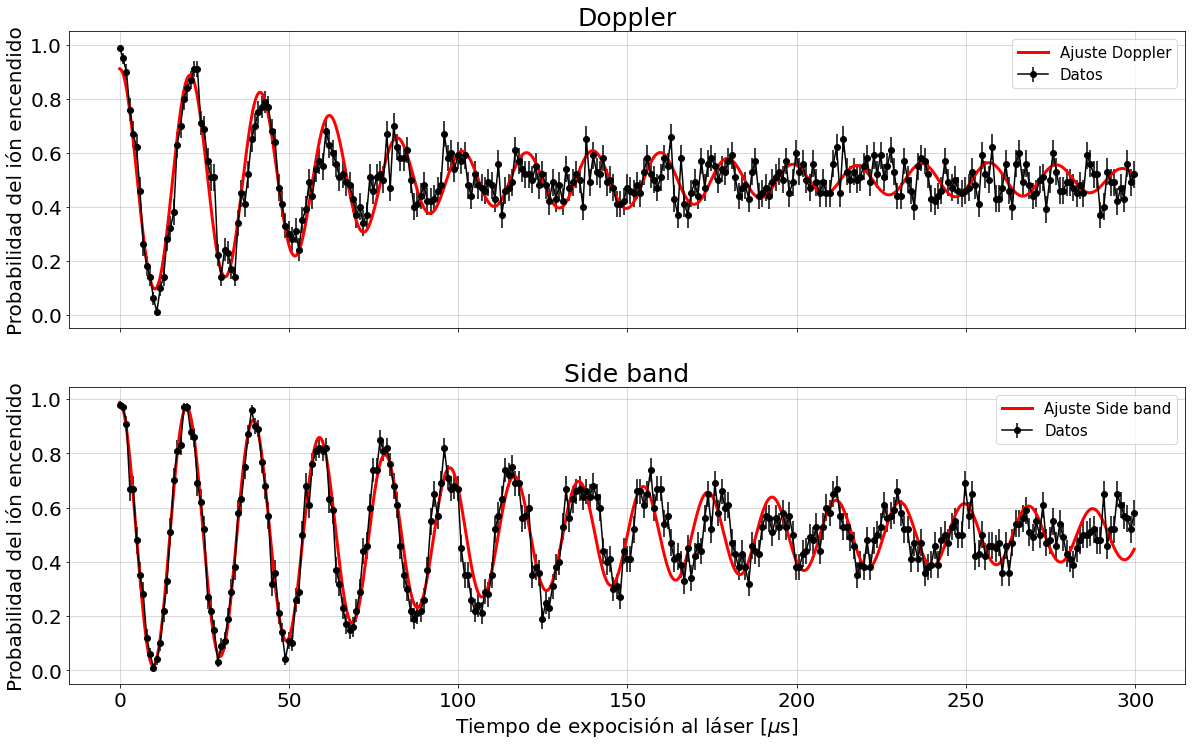

In [4]:
data = np.loadtxt("data/rawData/83/rawdataEMCCD.dat")

t, prob_dop, prob_sb, std_dop, std_sb = sep_data(data, th2)

tiempos_plot = np.linspace(min(t), max(t), 1000)

param_dop, pcov_dop = curve_fit(prob_fit, t, prob_dop, sigma = std_dop, absolute_sigma = True, p0=[ 0.1, 314000])
param_sb, pcov_sb = curve_fit(prob_fit, t, prob_sb, sigma = std_sb, absolute_sigma = True ,p0=[ 0.1, 314000])


fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20,12), sharex = True,facecolor ='w')

ax1.errorbar(t*1e6, prob_dop, fmt = 'o-', yerr = std_dop, color = 'k', label = 'Datos')
ax1.plot(tiempos_plot*1e6, prob_fit(tiempos_plot, *param_dop),'-', linewidth = 3, color = 'red', label = 'Ajuste Doppler')

#ax1.set_xlabel('Tiempo de expocisión al láser [$\mu$s]',color = 'k', fontsize = 25)
ax1.set_ylabel('Probabilidad del ión encendido', color = 'k',fontsize = 20)
ax1.tick_params(axis='both', labelsize = 20)
ax1.grid(alpha = 0.6)
ax1.set_title('Doppler', fontsize = 25)
ax1.legend(fontsize = 15)


ax2.errorbar(t*1e6, prob_sb, fmt = 'o-', color = 'k', yerr = std_sb, label = 'Datos')
ax2.plot(tiempos_plot*1e6, prob_fit(tiempos_plot, *param_sb), '-', linewidth = 3, color = 'red', label = 'Ajuste Side band')

plt.xlabel('Tiempo de expocisión al láser [$\mu$s]',color = 'k', fontsize = 20)
plt.ylabel('Probabilidad del ión encendido', color = 'k',fontsize = 20)
plt.tick_params(axis='both', labelsize = 20)
ax2.set_title('Side band', fontsize = 25)
ax2.grid(alpha = 0.6)
ax2.legend(fontsize = 15)
#legend  = plt.legend(fontsize=20)
#legend.get_frame().set_facecolor('#001633')
#plt.setp(legend.get_texts(), color='w')
plt.savefig('Sb+dop.pdf')#, dpi = 1000,  transparent = True)

print(param_dop)


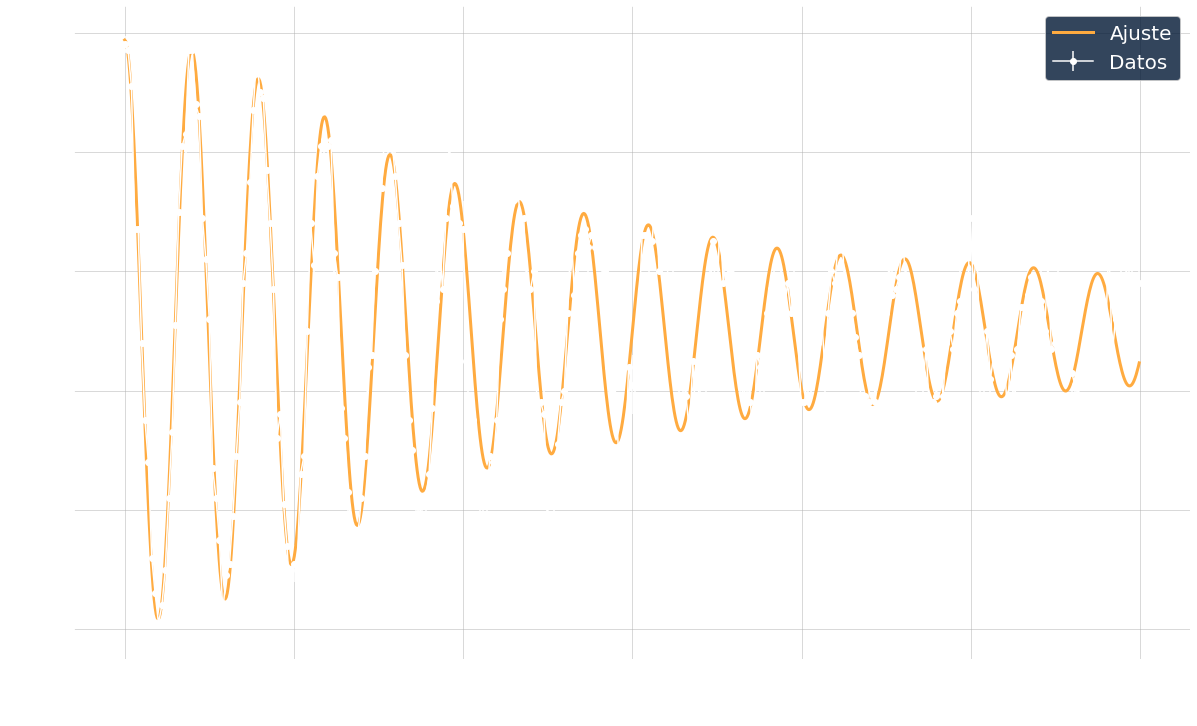

In [5]:
data = np.loadtxt("data/rawData/83/rawdataEMCCD.dat")

t, prob_dop, prob_sb, std_dop, std_sb = sep_data(data, th2)

tiempos_plot = np.linspace(min(t), max(t), 1000)

param_dop, pcov_dop = curve_fit(prob_fit, t, prob_dop, sigma = std_dop, absolute_sigma = True, p0=[ 0.1, 314000])
param_sb, pcov_sb = curve_fit(prob_fit, t, prob_sb, sigma = std_sb, absolute_sigma = True ,p0=[ 0.1, 314000])


with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white'}):
    fig, ax2 = plt.subplots(1,1,figsize=(20,12))

#     ax1.errorbar(t*1e6, prob_dop, fmt = 'o-', yerr = std_dop, color = '#ffffff', alpha = 0.6,label = 'Datos')
#     ax1.plot(tiempos_plot*1e6, prob_fit(tiempos_plot, *param_dop),'-', linewidth = 3, color = '#ffab40', label = 'Ajuste')

    ax2.errorbar(t*1e6, prob_sb, fmt = 'o-', color = '#ffffff', yerr = std_sb, label = 'Datos')
    ax2.plot(tiempos_plot*1e6, prob_fit(tiempos_plot, *param_sb), '-', linewidth = 3, color = '#ffab40', label = 'Ajuste')
    plt.xlabel('Tiempo de expocisión al láser [$\mu$s]',color = 'w', fontsize = 25)
    plt.ylabel('Probabilidad del ión encendido', color = 'w',fontsize = 25)
    plt.tick_params(axis='both', labelsize = 20)

    plt.grid(alpha = 0.6)
    legend  = plt.legend(fontsize=20)
    legend.get_frame().set_facecolor('#001633')
    plt.setp(legend.get_texts(), color='w')
    #plt.savefig('Sb.png', dpi = 1000,  transparent = True)



Una vez hecho el ajsute y calculado los parametros ya pdoemos calcular la temperatrua de cada uno de los metodos de enfirado y su $\Omega_0$, siendo la temperatura igual 

$$T = \frac{\hbar \nu}{k_B ln\left(\frac{\bar{n} + 1}{\bar{n}}\right)},$$
 con $\bar{n}$ el primer parametro de ajuste y $\Omega_0$ el segundo parametro de ajuste
 
 Con el siguiente error:
 
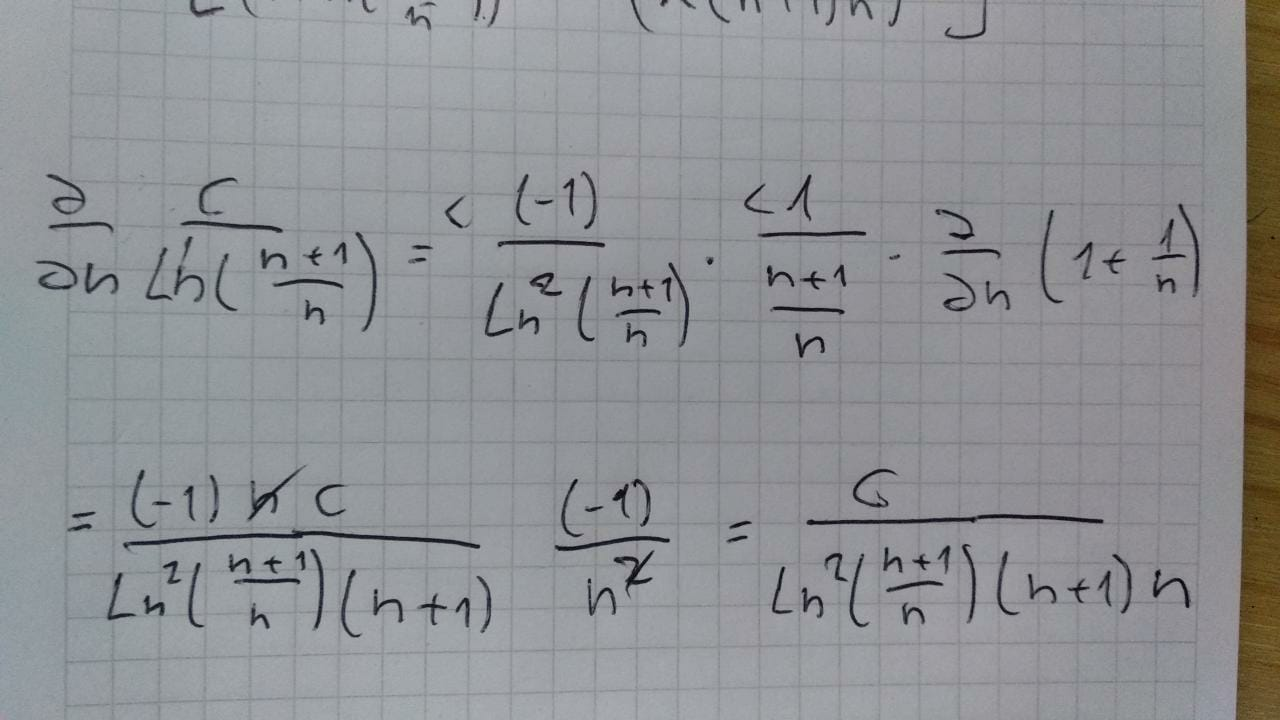

In [8]:
import pint

un = pint.UnitRegistry()
hbar = 1.054e-34 * un.joules * un.second
kb = 1.381e-23 * un.joules / un.kelvin
nu = 1e6 * un.hertz

nbar_dop = param_dop[0]
T_dop = hbar * nu / (kb * np.log((nbar_dop + 1)/nbar_dop))

er_n_dop = np.sqrt(np.diag(pcov_dop))[0]
er_omega_dop = np.sqrt(np.diag(pcov_dop))[1]
er_omega_sb  = np.sqrt(np.diag(pcov_sb))[1]

er_T_dop = (hbar * nu / (kb * (nbar_dop+1) * nbar_dop * (np.log((nbar_dop+1)/nbar_dop))**2) * er_n_dop)

nbar_sb = param_sb[0]
T_sb = hbar * nu / (kb * np.log((nbar_sb + 1)/nbar_sb))
er_n_sb = np.sqrt(np.diag(pcov_sb))[0]
er_T_sb = (hbar * nu / (kb * (nbar_sb+1) * nbar_sb* (np.log((nbar_sb+1)/nbar_sb))**2) * er_n_sb)

print('Para el caso de doppler obtuvimos   T = ', T_dop.to(un.kelvin), '±', er_T_dop.to(un.kelvin), 'y $\Omega_0$ = ', param_dop[1]/(2*np.pi),'±', er_omega_dop/(2*np.pi),'\n')
print('Para el caso de side band obtuvimos T = ', T_sb.to(un.kelvin), '±',er_T_sb.to(un.kelvin) , 'y $\Omega_0$ = ', param_sb[1]/(2*np.pi),'±', er_omega_sb/(2*np.pi))

print(nbar_sb, 'error', er_n_sb)

Para el caso de doppler obtuvimos   T =  0.00017654019657091527 kelvin ± 4.645112323732225e-06 kelvin y $\Omega_0$ =  51511.62514616958 ± 50.04185548150021 

Para el caso de side band obtuvimos T =  8.274284533540423e-05 kelvin ± 1.852996112186341e-06 kelvin y $\Omega_0$ =  52962.52635018079 ± 27.789045964727077
10.349039360914757 error 0.2426161344756226


In [13]:
from scipy.stats import chi2

def chisq(ydata, ymodelo,sd):
    chisq = sum(((ydata-ymodelo)/sd)**2)
    return chisq
    
def rval( ydata, chi, gl):  #reduce chi square   gl = numero de parametros de la funcion es bueno q este cerca de 1
    k=len(ydata)-1-gl
    rval=chi/k   
    return rval, k

def pvalor(chi, k):         #integral de ña distribucion de chisq es bueno q este cerca de 0
    p  = 1- chi2.cdf(chi, k)
    return p

modelo_sb  = prob_fit(t, *param_sb)
modelo_dop = prob_fit(t, *param_dop)
chi = chisq(prob_dop, modelo_dop, std_dop)
rval, k = rval(prob_dop, chi, 1)
p = pvalor(chi, k)
print(p, rval)

0.0 2.6109357857591036


### Pasamos a hacer esto mismo pero con otro set de datos

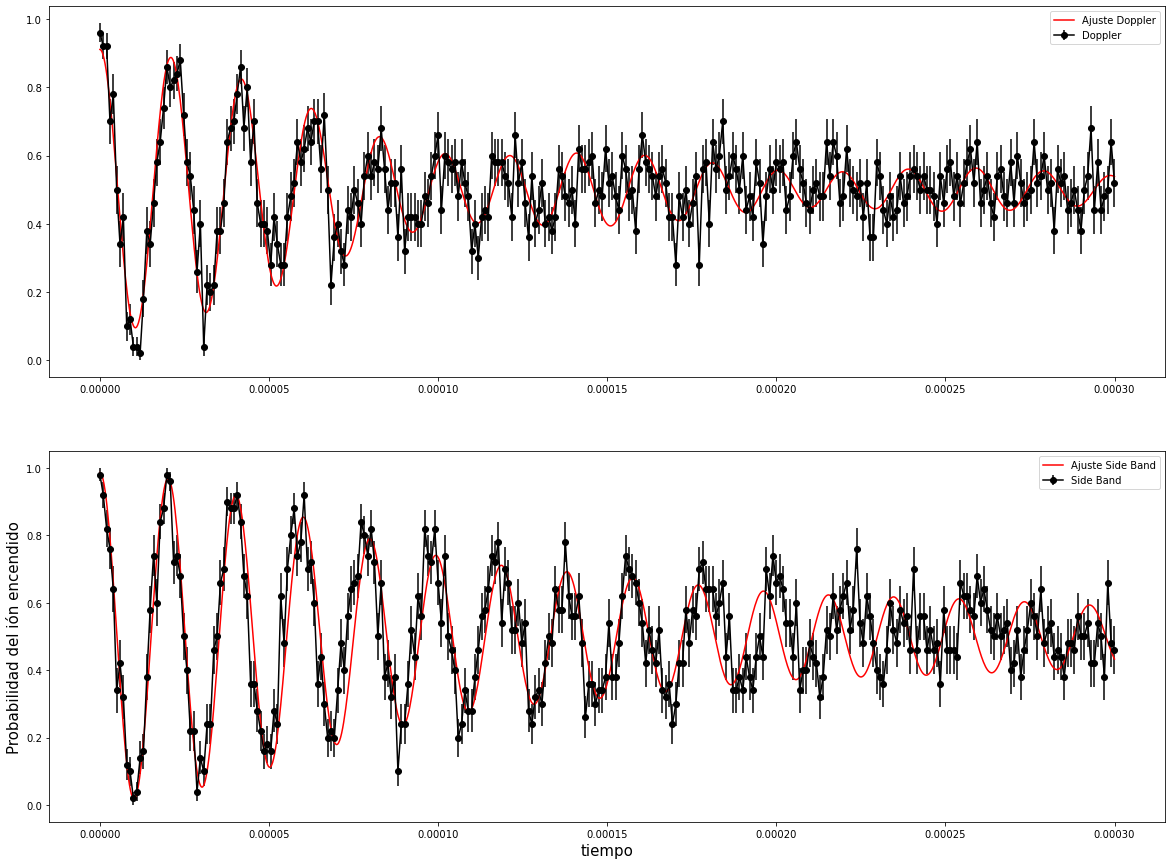

In [56]:
data = np.loadtxt("data/rawData/79/rawdataEMCCD.dat")

t, prob_dop, prob_sb, std_dop, std_sb = sep_data(data, th2)

tiempos_plot = np.linspace(min(t), max(t), 1000)

param_dop, pcov_dop = curve_fit(prob_fit, t, prob_dop, sigma = std_dop, absolute_sigma = True, p0=[ 0.1, 314000])
param_sb, pcov_sb = curve_fit(prob_fit, t, prob_sb, sigma = std_sb, absolute_sigma = True ,p0=[ 0.1, 314000])


fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,15), facecolor = 'w')

ax1.errorbar(t, prob_dop, fmt = 'o-k', yerr = std_dop, label = 'Doppler')
ax1.plot(tiempos_plot, prob_fit(tiempos_plot, *param_dop),'r-', label = 'Ajuste Doppler')
ax1.legend()

ax2.errorbar(t, prob_sb, fmt = 'o-k', yerr = std_sb, label = 'Side Band')
ax2.plot(tiempos_plot, prob_fit(tiempos_plot, *param_sb), 'r-',label = 'Ajuste Side Band')
plt.xlabel('tiempo', fontsize = 15)
plt.ylabel('Probabilidad del ión encendido', fontsize = 15)
plt.legend()

In [58]:
import pint

un = pint.UnitRegistry()
hbar = 1.054e-34 * un.joules * un.second
kb = 1.381e-23 * un.joules / un.kelvin
nu = 1e6 * un.hertz

nbar_dop = param_dop[0]
T_dop = hbar * nu / (kb * np.log((nbar_dop + 1)/nbar_dop))

er_n_dop = np.sqrt(np.diag(pcov_dop))[0]
er_T_dop = (hbar * nu / (kb * (nbar_dop+1) * nbar_dop * (np.log((nbar_dop+1)/nbar_dop))**2) * er_n_dop)

nbar_sb = param_sb[0]
T_sb = hbar * nu / (kb * np.log((nbar_sb + 1)/nbar_sb))
er_n_sb = np.sqrt(np.diag(pcov_sb))[0]
er_T_sb = (hbar * nu / (kb * (nbar_sb+1) * nbar_sb* (np.log((nbar_sb+1)/nbar_sb))**2) * er_n_sb)

print('Para el caso de doppler obtuvimos   T = ', T_dop.to(un.kelvin), '±', er_T_dop.to(un.kelvin), 'y $\Omega_0$ = ', param_dop[1],'\n')
print('Para el caso de side band obtuvimos T = ', T_sb.to(un.kelvin), '±',er_T_sb.to(un.kelvin) , 'y $\Omega_0$ = ', param_sb[1])

Para el caso de doppler obtuvimos   T =  0.00017707241979589497 kelvin ± 7.08867515071313e-06 kelvin y $\Omega_0$ =  320923.7811112842 

Para el caso de side band obtuvimos T =  8.521942563623608e-05 kelvin ± 2.7286633380065078e-06 kelvin y $\Omega_0$ =  326901.75866841926


### Calculo para el último set de archivos de este estilo

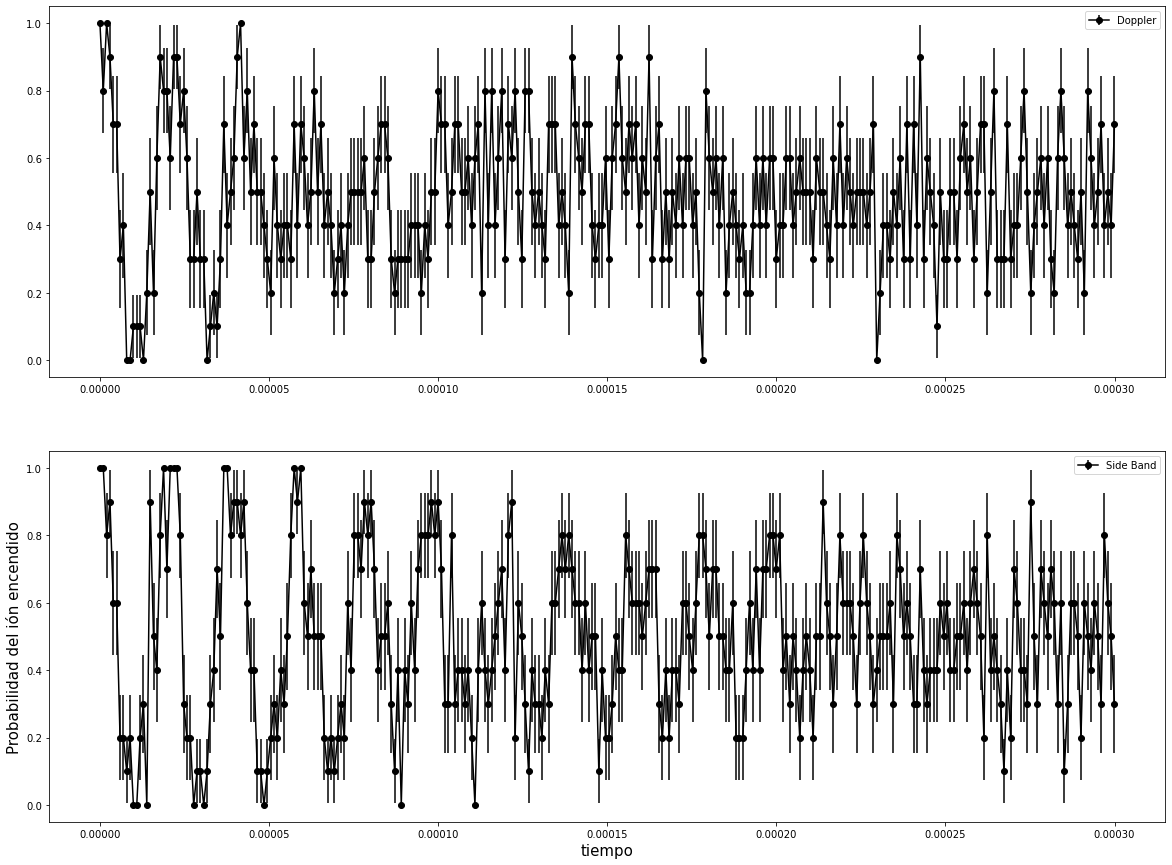

In [49]:
data = np.loadtxt("data/rawData/76/rawdataEMCCD.dat")

t, prob_dop, prob_sb, std_dop, std_sb = sep_data(data, th2)

tiempos_plot = np.linspace(min(t), max(t), 1000)

#param_dop, pcov_dop = curve_fit(prob_fit, t, prob_dop, sigma = std_dop, absolute_sigma = True, p0=[ 0.1, 314000])
#param_sb, pcov_sb = curve_fit(prob_fit, t, prob_sb, sigma = std_sb, absolute_sigma = True ,p0=[ 0.1, 314000])


fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,15), facecolor = 'w')

ax1.errorbar(t, prob_dop, fmt = 'o-k', yerr = std_dop, label = 'Doppler')
#ax1.plot(tiempos_plot, prob_fit(tiempos_plot, *param_dop),'r-', label = 'Ajuste Doppler')
ax1.legend()

ax2.errorbar(t, prob_sb, fmt = 'o-k', yerr = std_sb, label = 'Side Band')
#ax2.plot(tiempos_plot, prob_fit(tiempos_plot, *param_sb), 'r-',label = 'Ajuste Side Band')
plt.xlabel('tiempo', fontsize = 15)
plt.ylabel('Probabilidad del ión encendido', fontsize = 15)
plt.legend()

In [ ]:
import pint

un = pint.UnitRegistry()
hbar = 1.054e-34 * un.joules * un.second
kb = 1.381e-23 * un.joules / un.kelvin
nu = 1e6 * un.hertz

nbar_dop = param_dop[0]
T_dop = hbar * nu / (kb * np.log((nbar_dop + 1)/nbar_dop))

nbar_sb = param_sb[0]
T_sb = hbar * nu / (kb * np.log((nbar_sb + 1)/nbar_sb))
print('Para el caso de doppler obtuvimos   T = ', T_dop.to(un.kelvin), 'y $\Omega_0$ = ', param_dop[1],'\n')
print('Para el caso de side band obtuvimos T = ', T_sb.to(un.kelvin), 'y $\Omega_0$ = ', param_sb[1])

### Prueba con distintas bandas

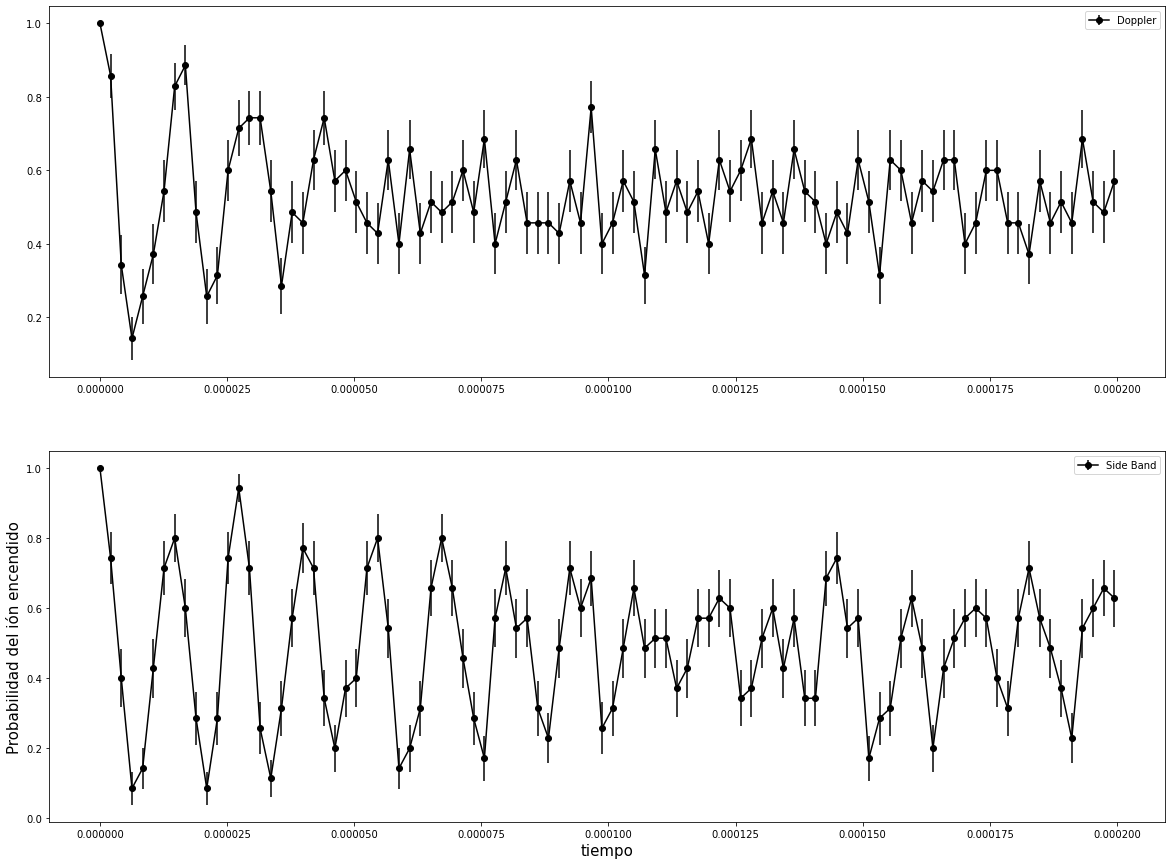

In [23]:
data = np.loadtxt("data/rawData/07/rawdataEMCCD.dat")

t, prob_dop, prob_sb, std_dop, std_sb = sep_data(data, th2)

tiempos_plot = np.linspace(min(t), max(t), 1000)

#param_dop, pcov_dop = curve_fit(prob_fit, t, prob_dop, sigma = std_dop, absolute_sigma = True, p0=[ 0.1, 314000])
#param_sb, pcov_sb = curve_fit(prob_fit, t, prob_sb, sigma = std_sb, absolute_sigma = True ,p0=[ 0.1, 314000])


fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,15), facecolor = 'w')

ax1.errorbar(t, prob_dop, fmt = 'o-k', yerr = std_dop, label = 'Doppler')
#ax1.plot(tiempos_plot, prob_fit(tiempos_plot, *param_dop),'r-', label = 'Ajuste Doppler')
ax1.legend()

ax2.errorbar(t, prob_sb, fmt = 'o-k', yerr = std_sb, label = 'Side Band')
#ax2.plot(tiempos_plot, prob_fit(tiempos_plot, *param_sb), 'r-',label = 'Ajuste Side Band')
plt.xlabel('tiempo', fontsize = 15)
plt.ylabel('Probabilidad del ión encendido', fontsize = 15)
plt.legend()